<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [5]:
movies = pd.read_csv('C:/Users/Mark Keong/Documents/GitHub/classes/unit-2_project/data/imdb_1000.csv')
movies.head(100)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


In [6]:
movies.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

#### Check the number of rows and columns.

In [7]:
movies.shape

(979, 6)

#### Check the data type of each column.

In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    976 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### Calculate the average movie duration.

In [9]:
movies['duration'].describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [10]:
movies['duration'].sort_values(ascending=False)

476    242
157    238
78     229
142    224
445    220
85     216
204    212
17     207
767    205
630    202
7      201
2      200
335    197
385    197
8      195
620    194
424    193
220    191
671    191
40     189
316    189
89     189
184    188
318    188
611    187
132    186
245    184
109    183
166    182
361    181
      ... 
766     83
759     83
174     83
306     82
595     82
330     81
789     81
738     81
541     81
117     81
622     80
297     80
283     80
533     80
853     80
513     80
535     79
489     78
864     78
713     78
303     76
405     75
938     75
351     70
742     69
88      68
293     68
258     67
338     66
389     64
Name: duration, Length: 979, dtype: int64

#### Create a histogram of duration, choosing an "appropriate" number of bins.

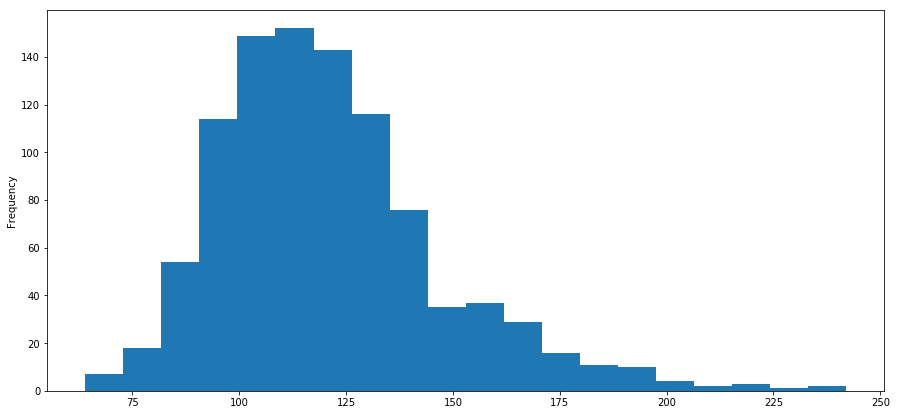

In [11]:
movies['duration'].plot(kind='hist', figsize=(15,7), bins=20)

#### Use a box plot to display that same data.

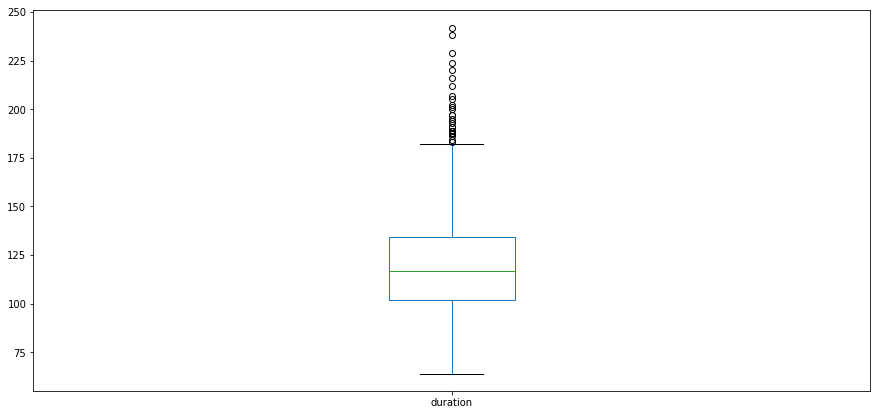

In [12]:
movies['duration'].plot(kind='box', figsize=(15,7))

## Intermediate level

#### Count how many movies have each of the content ratings.

In [13]:
movies.head()

movies.groupby('content_rating')['title'].count().sort_values(ascending=False)

content_rating
R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: title, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0,0.5,'Number of movies')

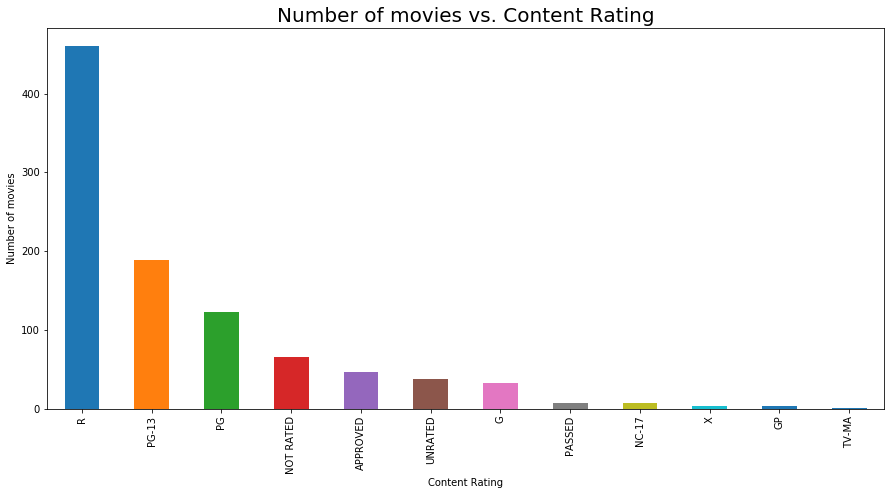

In [14]:
ax = movies.groupby('content_rating')['title'].count().sort_values(ascending=False).plot(kind='bar', figsize=(15,7))
ax.set_title('Number of movies vs. Content Rating', fontdict={'fontsize': 20})
ax.set_xlabel('Content Rating')
ax.set_ylabel('Number of movies')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [15]:
movies['content_rating'].unique()

array(['R', 'PG-13', 'NOT RATED', 'PG', 'UNRATED', 'APPROVED', 'PASSED',
       'G', 'X', nan, 'TV-MA', 'GP', 'NC-17'], dtype=object)

In [16]:
# Answer:
movies_1 = movies.replace({'content_rating': ['NOT RATED', 'APPROVED', 'PASSED', 'GP']}, 'UNRATED')
movies_1['content_rating'].unique()

array(['R', 'PG-13', 'UNRATED', 'PG', 'G', 'X', nan, 'TV-MA', 'NC-17'],
      dtype=object)

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [17]:
# Answer:
movies.replace({'content_rating': ['X', 'TV-MA']}, 'NC-17')

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


#### Count the number of missing values in each column.

In [18]:
# Answer:
movies.isna().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [19]:
# Answer:
movies['content_rating'].fillna(value='Nil')

0              R
1              R
2              R
3          PG-13
4              R
5      NOT RATED
6      NOT RATED
7          PG-13
8              R
9              R
10         PG-13
11         PG-13
12            PG
13         PG-13
14         PG-13
15         PG-13
16             R
17       UNRATED
18             R
19            PG
20             R
21             R
22      APPROVED
23             R
24             R
25         PG-13
26         PG-13
27             R
28             R
29        PASSED
         ...    
949           PG
950            R
951            R
952            R
953           PG
954        PG-13
955            R
956           PG
957            R
958        PG-13
959            R
960        PG-13
961            R
962           PG
963            R
964        PG-13
965        PG-13
966        PG-13
967            R
968            R
969            R
970            R
971            R
972        NC-17
973        PG-13
974           PG
975           PG
976        PG-

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [20]:
# Answer:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [21]:
movies['star_rating'][movies['duration'] < 120].mean()

7.838666666666657

In [22]:
movies['star_rating'][movies['duration'] >= 120].mean()

7.948898678414082

#### Use a visualization to detect whether there is a relationship between duration and star rating.

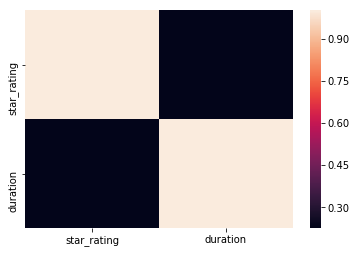

In [23]:
# Answer:
import seaborn as sns
sns.heatmap(movies.corr())

#### Calculate the average duration for each genre.

In [24]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [25]:
# Answer:
movies.groupby('genre')['duration'].mean().round(2)

genre
Action       126.49
Adventure    134.84
Animation     96.60
Biography    131.84
Comedy       107.60
Crime        122.30
Drama        126.54
Family       107.50
Fantasy      112.00
Film-Noir     97.33
History       66.00
Horror       102.52
Mystery      115.62
Sci-Fi       109.00
Thriller     114.20
Western      136.67
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

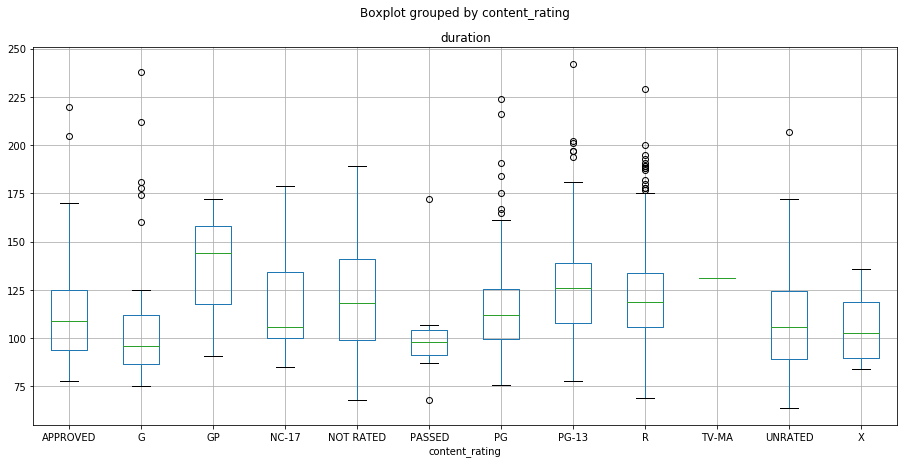

In [38]:
movies.head()
movies.boxplot(by='content_rating', column='duration', figsize=(15,7))

#### Determine the top rated movie (by star rating) for each genre.

In [44]:
DISPLAY_COLS = ['star_rating', 'genre', 'title']

movies_sort = movies.sort_values('star_rating', ascending=False)
movies_sort = movies_sort.groupby('genre').head(1)[DISPLAY_COLS]
movies_sort.head()

,star_rating,genre,title
0,9.3,Crime,The Shawshank Redemption
3,9.0,Action,The Dark Knight
5,8.9,Drama,12 Angry Men
6,8.9,Western,"The Good, the Bad and the Ugly"
7,8.9,Adventure,The Lord of the Rings: The Return of the King


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [52]:
# Answer:
duplicate = movies[movies['title'].duplicated(False)].copy()
duplicate

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [68]:
movies['genre'].value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [79]:
genre_counts = movies.genre.value_counts()

relevant_genres = list(genre_counts[genre_counts>10].index)

movies[movies['genre'].isin(relevant_genres)]

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
10,8.8,The Lord of the Rings: The Fellowship of the Ring,PG-13,Adventure,178,"[u'Elijah Wood', u'Ian McKellen', u'Orlando Bl..."


#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [80]:
booleanSeries = movies.genre.value_counts() #count genres for number of films
booleanSeries = booleanSeries >= 10
booleanSeries

movieMeans = movies.groupby('genre').star_rating.mean()
movieMeans[booleanSeries]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [81]:
movieMeans = movies.groupby('genre').star_rating.agg(['count', 'mean'])
movieMeans['counts'] = movieMeans['count']

# We use 'counts' because 'count' is a DataFrame method
movieMeans[movieMeans.counts >= 10]

,count,mean,counts
genre,,,
Action,136,7.884559,136
Adventure,75,7.933333,75
Animation,62,7.914516,62
Biography,77,7.862338,77
Comedy,156,7.822436,156
Crime,124,7.916935,124
Drama,278,7.902518,278
Horror,29,7.806897,29
Mystery,16,7.975000,16


## Bonus

#### Figure out something "interesting" using the actors data!